In [2]:
import pandas as pd

In [3]:
pprecipes = pd.read_csv("../data/PP_recipes.csv")

In [4]:
rawrecipes = pd.read_csv("../data/RAW_recipes.csv")

In [5]:
TECHNIQUES_LIST = ['bake', 'barbecue', 'blanch', 'blend', 'boil', 'braise', 'brine', 'broil', 'caramelize', 'combine', 'crock pot', 'crush', 'deglaze', 'devein', 'dice', 'distill', 'drain', 'emulsify', 'ferment', 'freez', 'fry', 'grate', 'griddle', 'grill', 'knead', 'leaven', 'marinate', 'mash', 'melt', 'microwave', 'parboil', 'pickle', 'poach', 'pour', 'pressure cook', 'puree', 'refrigerat', 'roast', 'saute', 'scald', 'scramble', 'shred', 'simmer', 'skillet', 'slow cook', 'smoke', 'smooth', 'soak', 'sous-vide', 'steam', 'stew', 'strain', 'tenderize', 'thicken', 'toast', 'toss', 'whip', 'whisk']

In [6]:
interactions = pd.read_csv("../data/interactions_test.csv") + pd.read_csv("../data/interactions_train.csv") + pd.read_csv("../data/interactions_validation.csv")

In [7]:
rawinteractions = pd.read_csv("../data/RAW_interactions.csv")

In [65]:
def bayesian_average(r,v,c,m=10): #score function that takes into account the number of reviews
    return (r*v/(v+m))+(c*m/(v+m))

"""
r = Moyenne des notes pour une recette.
v = Nombre d'évaluations pour cet item.
c = Moyenne globale des notes sur l'ensemble du dataset.
m = Seuil minimum de votes requis pour qu'un item soit considéré pertinent (une constante que vous définissez).
"""

"\nr = Moyenne des notes pour une recette.\nv = Nombre d'évaluations pour cet item.\nc = Moyenne globale des notes sur l'ensemble du dataset.\nm = Seuil minimum de votes requis pour qu'un item soit considéré pertinent (une constante que vous définissez).\n"

In [95]:
r = mean_score(40893,rawinteractions)
v = nb_reviews(40893,rawinteractions)
c = global_mean_score(rawinteractions)
bayesian_average(r,v,c,10)

4.4258466998773365

In [51]:
def mean_score(recipe_id, database): 
    return database[database['recipe_id'] == recipe_id]["rating"].mean()

In [54]:
def global_mean_score(database):
    return database["rating"].mean()

In [61]:
def nb_reviews(recipe_id, database):
    return database[database["recipe_id"] == recipe_id].shape[0]

In [8]:
import ast  # ou import json

# Utilisation d'ast.literal_eval pour convertir les strings en listes
pprecipes['techniques'] = pprecipes['techniques'].apply(ast.literal_eval)


In [57]:
len(rawinteractions[rawinteractions['recipe_id'] == 40893 ]["rating"])

2

In [58]:
rawinteractions

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [60]:
# Créer un tableau de totaux initialisé à zéro
ratings = pd.Series([0] * len(TECHNIQUES_LIST), index=TECHNIQUES_LIST)
compteur = pd.Series([0] * len(TECHNIQUES_LIST), index=TECHNIQUES_LIST)
# Ajouter les occurrences
for index, row in pprecipes.iterrows():
    for i, value in enumerate(row['techniques']):
        if value == 1:  # Si la technique est présente
            if len(rawinteractions[rawinteractions['recipe_id'] == row['id'] ]["rating"]) > 0:
                compteur.at[TECHNIQUES_LIST[i]] += 1
                ratings.at[TECHNIQUES_LIST[i]] += rawinteractions[rawinteractions['recipe_id'] == row['id']]["rating"].mean()
for i in range(len(TECHNIQUES_LIST)):
    ratings[i] /= compteur[i]

# Afficher les totaux
print("\nFréquence des techniques :")
print(ratings.sort_values(ascending=False))

C:\Users\bapti\AppData\Local\Temp\ipykernel_12088\4234760648.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.833333333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ratings.at[TECHNIQUES_LIST[i]] += rawinteractions[rawinteractions['recipe_id'] == row['id']]["rating"].mean()


KeyboardInterrupt: 

In [ ]:
labels = ['bake', 'combine', 'pour', 'boil', 'other']
sizes = [ratings['bake'], ratings['combine'], ratings['pour'], ratings['boil'], ratings[4:].mean()]  # Pourcentages ou valeurs

plt.title("techniques les plus utilisées")
# Tracé du camembert
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# S'assurer que le camembert est bien circulaire
plt.axis('equal')

# Affichage
plt.show()

In [ ]:
#techniques les plus utilisées camembert top 5
#technique qui ont les meilleures notes camembert top 5
#utilisation de ces techniques au cours du temps

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
rawrecipes = pd.read_csv("../data/RAW_recipes.csv")
pprecipes = pd.read_csv("../data/PP_recipes.csv")
rawinteractions = pd.read_csv("../data/RAW_interactions.csv")

In [3]:
TECHNIQUES_LIST = ['bake', 'barbecue', 'blanch', 'blend', 'boil', 'braise', 'brine', 'broil', 'caramelize', 'combine', 'crock pot', 'crush', 
                   'deglaze', 'devein', 'dice', 'distill', 'drain', 'emulsify', 'ferment', 'freez', 'fry', 'grate', 'griddle', 'grill', 'knead', 
                   'leaven', 'marinate', 'mash', 'melt', 'microwave', 'parboil', 'pickle', 'poach', 'pour', 'pressure cook', 'puree', 
                   'refrigerat', 'roast', 'saute', 'scald', 'scramble', 'shred', 'simmer', 'skillet', 'slow cook', 'smoke', 'smooth', 'soak', 
                   'sous-vide', 'steam', 'stew', 'strain', 'tenderize', 'thicken', 'toast', 'toss', 'whip', 'whisk']

In [4]:
# Convertir les listes (considéré comme des strings, en liste python)
rawrecipes['nutrition'] = rawrecipes['nutrition'].apply(ast.literal_eval)

rawrecipes['tags'] = rawrecipes['tags'].apply(ast.literal_eval)

rawrecipes['steps'] = rawrecipes['steps'].apply(ast.literal_eval)

rawrecipes['ingredients'] = rawrecipes['ingredients'].apply(ast.literal_eval)

# Utilisation d'ast.literal_eval pour convertir les strings en listes
pprecipes['techniques'] = pprecipes['techniques'].apply(ast.literal_eval)


# Convertir les dates en 'datetype' python :
rawrecipes['submitted'] = pd.to_datetime(rawrecipes['submitted'])

rawinteractions['date'] = pd.to_datetime(rawinteractions['date'])



In [5]:
rawrecipes.rename(columns={'id': 'recipe_id'}, inplace=True)
pprecipes.rename(columns={'id': 'recipe_id'}, inplace=True)

In [6]:
bigdf = pd.merge(rawrecipes, pprecipes, on='recipe_id')
bigdf = pd.merge(bigdf, rawinteractions, on='recipe_id')

In [7]:
bigdf = bigdf.groupby(['recipe_id']).agg({ 
    'i': 'first', 
    'name_tokens': 'first', 
    'ingredient_tokens': 'first',
    'steps_tokens': 'first', 
    'techniques': 'first', 
    'calorie_level': 'first', 
    'ingredient_ids': 'first',
    'name':'first',
    'minutes':'first',
    'contributor_id':'first',
    'submitted':'first',
    'tags':'first',
    'nutrition':'first',
    'steps':'first',
    'n_steps':'first',
    'description':'first',
    'ingredients':'first',
    'n_ingredients':'first',
    'review': lambda x: list(x) if len(x) > 0 else [], 
    'date': lambda x: list(x) if len(x) > 0 else [],
    'user_id': lambda x: list(x) if len(x) > 0 else [],
    'rating': lambda x: list(x) if len(x) > 0 else []
}).reset_index()

In [8]:
# Calculer le total des techniques
# Créer un tableau de totaux initialisé à zéro
techniques_counts = pd.Series([0] * len(TECHNIQUES_LIST), index=TECHNIQUES_LIST)

# Ajouter les occurrences
for index, row in bigdf.iterrows():
    for i, value in enumerate(row['techniques']):
        if value == 1:  # Si la technique est présente
            techniques_counts.at[TECHNIQUES_LIST[i]] += 1
techniques_counts = techniques_counts.sort_values(ascending=False)
# Afficher les totaux
print("\nFréquence des techniques :")
print(techniques_counts)


Fréquence des techniques :
bake             64821
combine          60136
pour             48747
boil             42354
melt             30865
drain            29567
blend            29387
simmer           29380
skillet          26825
refrigerat       20543
smooth           20465
toss             18166
whisk            16467
saute            15835
fry              15086
thicken          11753
grill             8942
whip              7933
roast             6677
mash              6460
microwave         6405
toast             6259
grate             5584
freez             5405
broil             5178
crush             4737
shred             4702
puree             4535
marinate          4437
dice              4156
steam             3775
strain            3605
soak              3397
knead             2702
crock pot         2628
slow cook         2498
griddle           1248
barbecue          1240
stew              1074
smoke             1023
pickle             984
caramelize         910
scramb

C:\Users\bapti\AppData\Local\Temp\ipykernel_15716\787222475.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sizes = [techniques_counts[i] for i in range(5)]


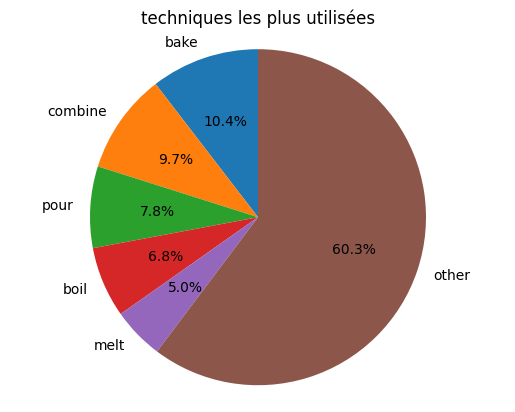

In [9]:

labels = [techniques_counts.index[i] for i in range(5)]
labels.append('other')
sizes = [techniques_counts[i] for i in range(5)]
sizes.append(techniques_counts[4:].sum())

plt.title("techniques les plus utilisées")
# Tracé du camembert
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# S'assurer que le camembert est bien circulaire
plt.axis('equal')

# Affichage
plt.show()

In [10]:
# Calculer le score des techniques
# Créer un tableau de totaux initialisé à zéro
techniques_score = pd.Series([0] * len(TECHNIQUES_LIST), index=TECHNIQUES_LIST)
compteur = pd.Series([0] * len(TECHNIQUES_LIST), index=TECHNIQUES_LIST)

# Ajouter les occurrences
for index, row in bigdf.iterrows():
    for i, value in enumerate(row['techniques']):
        if value == 1:  # Si la technique est présente
            techniques_score.at[TECHNIQUES_LIST[i]] += np.mean(row['rating'])
            compteur.at[TECHNIQUES_LIST[i]] += 1
for i in range(len(TECHNIQUES_LIST)):
    techniques_score[i] = techniques_score[i]/compteur[i]
techniques_score = techniques_score.sort_values(ascending=False)
# Afficher les totaux
print("\nScore moyen des techniques :")
print(techniques_score)

C:\Users\bapti\AppData\Local\Temp\ipykernel_15716\3576197690.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  techniques_score.at[TECHNIQUES_LIST[i]] += np.mean(row['rating'])



Score moyen des techniques :
distill          4.574561
grill            4.524372
barbecue         4.505169
toast            4.501880
poach            4.489473
devein           4.487620
braise           4.486535
broil            4.483357
scramble         4.483217
toss             4.478488
roast            4.475399
strain           4.472172
caramelize       4.460938
parboil          4.458576
refrigerat       4.455891
marinate         4.449695
griddle          4.448818
blanch           4.446696
whip             4.443585
crush            4.433221
skillet          4.432978
whisk            4.430628
deglaze          4.426828
melt             4.426572
freez            4.426003
saute            4.419207
grate            4.414718
combine          4.411526
mash             4.409996
puree            4.409646
emulsify         4.407622
dice             4.407401
shred            4.405965
drain            4.401505
blend            4.400800
smoke            4.399334
simmer           4.398872
smooth  

C:\Users\bapti\AppData\Local\Temp\ipykernel_15716\3576197690.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  techniques_score[i] = techniques_score[i]/compteur[i]
C:\Users\bapti\AppData\Local\Temp\ipykernel_15716\3576197690.py:13: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  techniques_score[i] = techniques_score[i]/compteur[i]
C:\Users\bapti\AppData\Local\Temp\ipykernel_15716\3576197690.py:13: RuntimeWarning: invalid value encountered in scalar divide
  techniques_score[i] = techniques_score[i]/compteur[i]


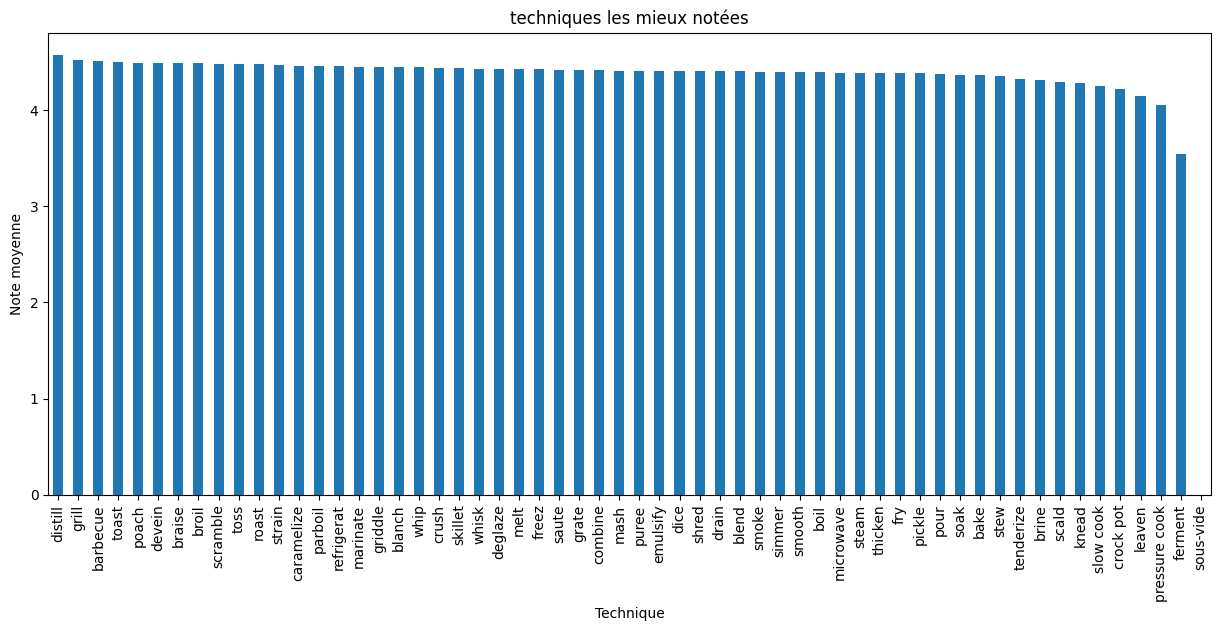

In [11]:
techniques_score.plot(kind='bar', figsize=(15, 6))
plt.title("techniques les mieux notées")
plt.xlabel("Technique")
plt.ylabel("Note moyenne")
plt.show()

In [12]:
technique_occurrences_by_date = {}

# Ajouter les occurrences par technique et par date
for index, row in bigdf.iterrows():
    date = row['submitted'].date().year  # Récupérer uniquement la date
    if date not in technique_occurrences_by_date:
        technique_occurrences_by_date[date] = pd.Series([0] * len(TECHNIQUES_LIST), index=TECHNIQUES_LIST)

    for i, value in enumerate(row['techniques']):
        if value == 1:  # Si la technique est présente
            technique_occurrences_by_date[date].at[TECHNIQUES_LIST[i]] += 1

# Convertir le dictionnaire en DataFrame pour une meilleure lisibilité
occurrences_df = pd.DataFrame.from_dict(technique_occurrences_by_date, orient='index')

# Afficher le résultat
print("\nNombre d'occurrences des techniques par date :")
print(occurrences_df)


Nombre d'occurrences des techniques par date :
      bake  barbecue  blanch  blend  boil  braise  brine  broil  caramelize  \
1999   699        11       6    304   397       1      1     51           2   
2000   339         5       4    218   225       0      1     37           2   
2001  1379        29      11    569   951       5      8    104          15   
2002  6509        81      58   2693  3960      16     12    547          55   
2003  5777        90      54   2532  3552      14     17    380          55   
2004  5438        72      37   2292  3149       6     23    406          66   
2005  7433       119      64   3308  4443       7     24    594          80   
2006  7740       159      70   3669  5165      20     18    646          97   
2007  9393       194      73   4318  6199       8     25    759         136   
2008  8136       179      58   3739  5416      10     31    623         117   
2009  5688       130      48   2684  3885       9     21    413         109   
2010

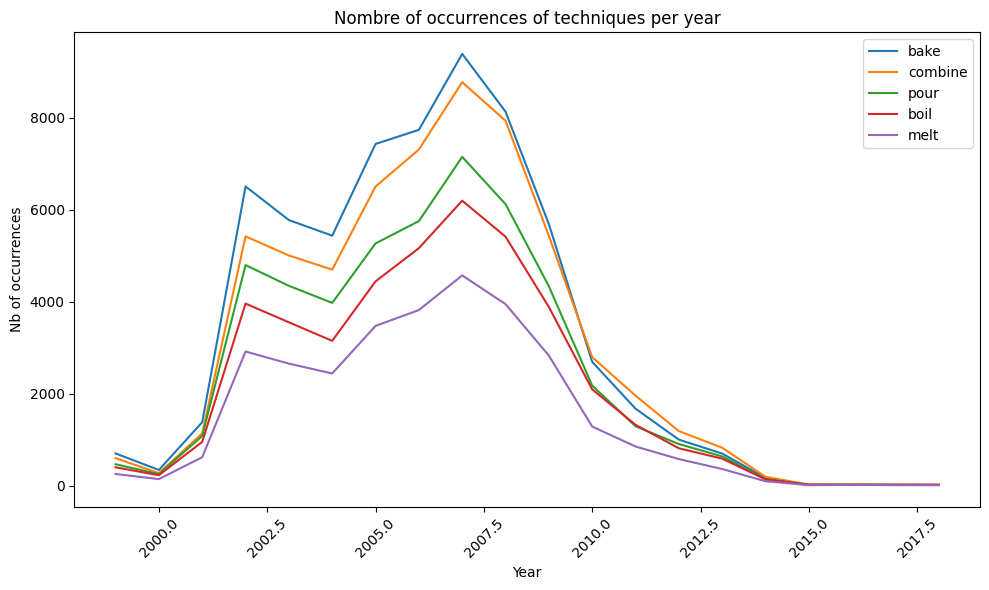

In [13]:
# Créer un graphique des occurrences de techniques par date
plt.figure(figsize=(10, 6))

# Tracer une courbe pour chaque technique
for technique in [techniques_counts.index[i] for i in range(5)]:
    plt.plot(occurrences_df.index, occurrences_df[technique], label=technique)

# Ajouter des labels et un titre
plt.xlabel('Year')
plt.ylabel('Nb of occurrences')
plt.title('Nombre of occurrences of techniques per year')

# Rotation de l'axe des dates pour une meilleure lisibilité
plt.xticks(rotation=45)

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()


C:\Users\bapti\AppData\Local\Temp\ipykernel_15716\1220631102.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


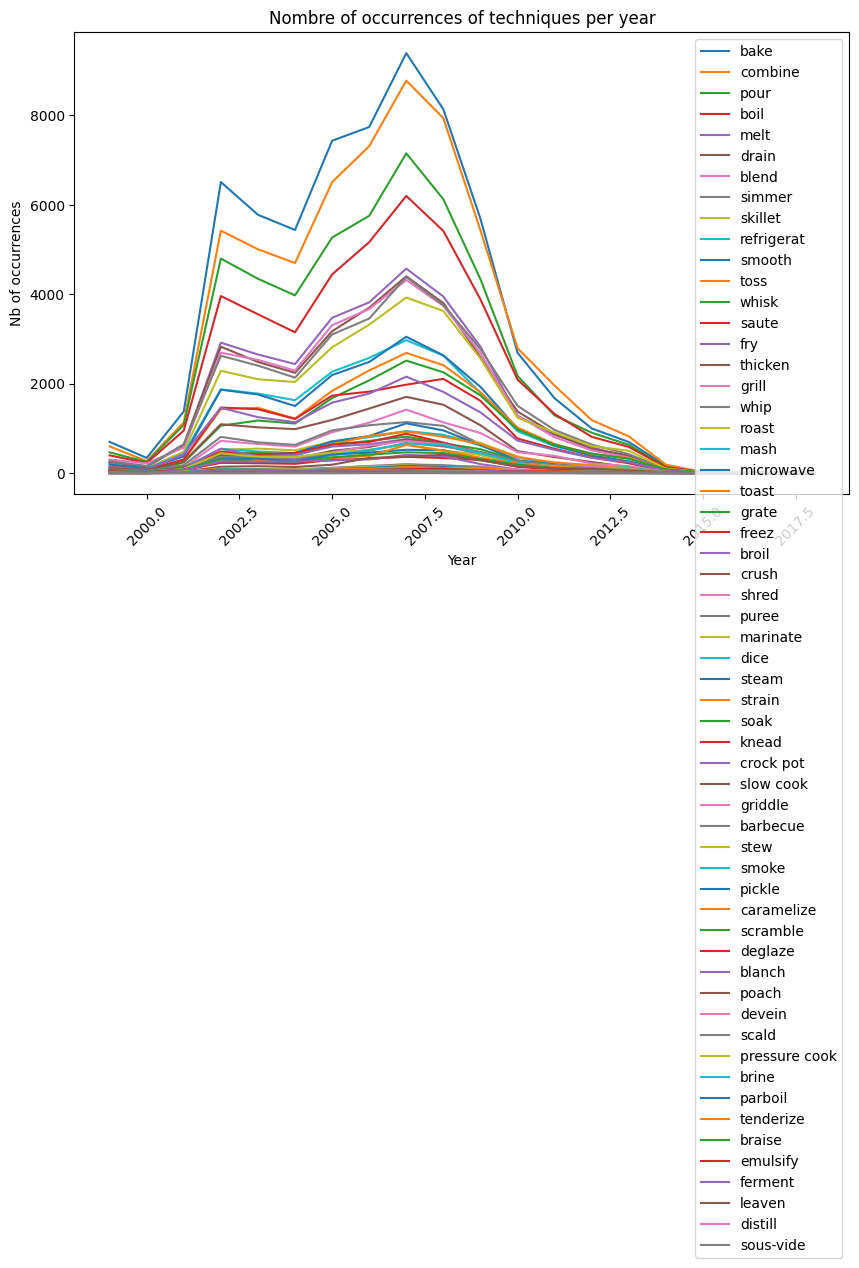

In [19]:
# Créer un graphique des occurrences de techniques par date
plt.figure(figsize=(10, 6))

# Tracer une courbe pour chaque technique
for technique in [i for i in techniques_counts.index]:
    plt.plot(occurrences_df.index, occurrences_df[technique], label=technique)

# Ajouter des labels et un titre
plt.xlabel('Year')
plt.ylabel('Nb of occurrences')
plt.title('Nombre of occurrences of techniques per year')

# Rotation de l'axe des dates pour une meilleure lisibilité
plt.xticks(rotation=45)

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()

In [24]:
occurrences_df

,bake,barbecue,blanch,blend,boil,braise,brine,broil,caramelize,combine,...,sous-vide,steam,stew,strain,tenderize,thicken,toast,toss,whip,whisk
1999,699,11,6,304,397,1,1,51,2,597,...,0,41,9,38,0,100,46,120,79,96
2000,339,5,4,218,225,0,1,37,2,269,...,0,27,3,10,2,74,27,58,48,34
2001,1379,29,11,569,951,5,8,104,15,1135,...,0,77,35,64,3,255,90,286,179,239
2002,6509,81,58,2693,3960,16,12,547,55,5423,...,0,320,95,248,12,1093,469,1431,810,1061
2003,5777,90,54,2532,3552,14,17,380,55,5006,...,0,322,82,275,6,1023,447,1462,688,1176
2004,5438,72,37,2292,3149,6,23,406,66,4699,...,0,263,79,218,10,984,416,1219,631,1109
2005,7433,119,64,3308,4443,7,24,594,80,6507,...,0,416,107,336,12,1189,642,1839,955,1678
2006,7740,159,70,3669,5165,20,18,646,97,7312,...,0,458,145,384,23,1444,833,2296,1070,2074
2007,9393,194,73,4318,6199,8,25,759,136,8777,...,0,522,175,628,20,1705,931,2687,1141,2516
2008,8136,179,58,3739,5416,10,31,623,117,7939,...,0,511,132,502,21,1529,812,2414,1057,2255


In [40]:
traffic = [occurrences_df[occurrences_df.index == i].sum(axis=1) for i in occurrences_df.index]

In [57]:
traffic["index" == 1999]

1999    5289
dtype: int64

In [69]:
occurrences_df_normalized = occurrences_df.copy()

for i in occurrences_df.index:
    occurrences_df_normalized[occurrences_df_normalized.index == i] = occurrences_df[occurrences_df.index == i]/traffic["index" == i].sum()


C:\Users\bapti\AppData\Local\Temp\ipykernel_15716\362459815.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.13216109]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  occurrences_df_normalized[occurrences_df_normalized.index == i] = occurrences_df[occurrences_df.index == i]/traffic["index" == i].sum()
C:\Users\bapti\AppData\Local\Temp\ipykernel_15716\362459815.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.00207979]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  occurrences_df_normalized[occurrences_df_normalized.index == i] = occurrences_df[occurrences_df.index == i]/traffic["index" == i].sum()
C:\Users\bapti\AppData\Local\Temp\ipykernel_15716\362459815.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated

In [70]:
occurrences_df[occurrences_df.index == 1999]

,bake,barbecue,blanch,blend,boil,braise,brine,broil,caramelize,combine,...,sous-vide,steam,stew,strain,tenderize,thicken,toast,toss,whip,whisk
1999,699,11,6,304,397,1,1,51,2,597,...,0,41,9,38,0,100,46,120,79,96


C:\Users\bapti\AppData\Local\Temp\ipykernel_15716\3134672036.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


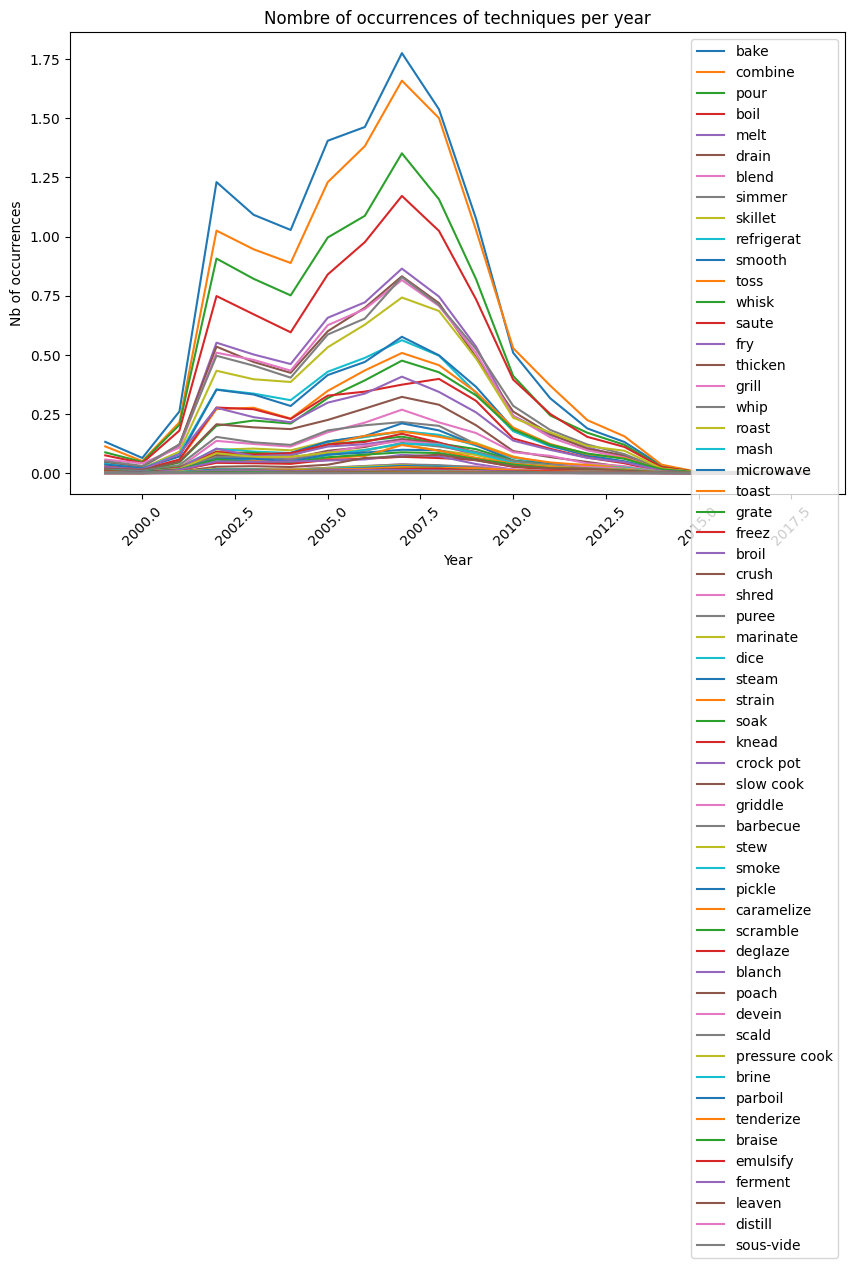

In [72]:
# Créer un graphique des occurrences de techniques par date
plt.figure(figsize=(10, 6))


# Tracer une courbe pour chaque technique
for technique in [i for i in techniques_counts.index]:
    plt.plot(occurrences_df.index, occurrences_df_normalized[technique], label=technique)

# Ajouter des labels et un titre
plt.xlabel('Year')
plt.ylabel('Nb of occurrences')
plt.title('Nombre of occurrences of techniques per year')

# Rotation de l'axe des dates pour une meilleure lisibilité
plt.xticks(rotation=45)

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()